# Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [164]:
import re

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', 200)

In [3]:
df = pd.read_csv('./data/amazon.csv')

# Data cleaning and initial exploration

In [96]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


We can drop the image and product link for now as they don't provide any meaningful data.
<br>
<br>The User_id, user_name, and review_id columns have grouped every known user/review together for the product. 
<br>These will be kept for now as they could be split later on to delve into specific product sentiment analysis

In [4]:
df.drop(['img_link', 'product_link'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
dtypes: object(14)
memory usage: 160.4+ KB


Need to change the prices, discount percent, rating and rating counts to numeric values

In [5]:
columns = ['discounted_price', 'actual_price']
for col in columns:
    df[col] = df[col].apply(lambda x: x.replace('₹', '').replace(',', '')).astype('float64')

In [6]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

Let's look for the null rating_count products and see what's going on

In [10]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
282,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,999.0,80%,3.0,NaN,USB C to C Cable: This cable has type C connector at both ends and a USB C type wall charger/adapter will be required to be used with this cable|Durable and sturdy: 1 meter long cable with 5mm thi...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,"I have a pd supported car charger and I bought solimo cables previously which work perfectly fine but this one doesn't trigger full 3A fast charging unlike solimo usb a to usb c, which is strange ..."
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,249.0,999.0,75%,5.0,NaN,"💎[The Fastest Charge] - This iPhone USB C cable supports PD 3.0 fast charging, up to 20W with USB-C Power Delivery adapters such as 18W, 20W, 29W, 30W, 61W, or 87W. Charge your iPhone from 0% to 5...",AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was goodJust opened the productExcited to you it


Seems like they only have 1 purchase each so we can just replace NaN with 1

In [11]:
df['rating_count'].fillna(1, inplace=True)

In [12]:
df['rating_count'] = df['rating_count'].astype('str')

In [13]:
df['rating_count'] = df['rating_count'].apply(lambda x: x.replace(',', '')).astype('int64')
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x.replace('%', '')).astype('int64')

In [14]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

One of the ratings is a | which will need dealing with.<br>
From searching the product_id on amazon.id I can see that the product has a rating of 3.9 so that will be applied here

In [15]:
df.loc[df['rating'] == '|','rating'] = 3.9

In [16]:
df['rating'] = df['rating'].astype('float64')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 160.4+ KB


### With the preliminary data clean up complete let's start exploring

In [170]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096451,18270.565870
std,6944.304394,10874.826864,21.635905,0.291620,42729.994731
min,39.000000,39.000000,0.000000,2.000000,1.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


<Axes: xlabel='rating', ylabel='actual_price'>

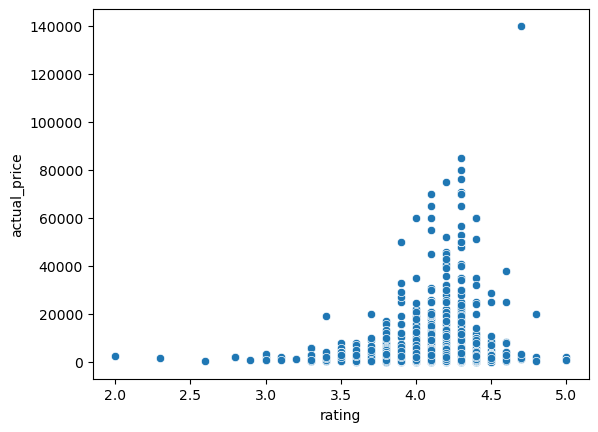

In [17]:
sns.scatterplot(df,x='rating',y='actual_price')

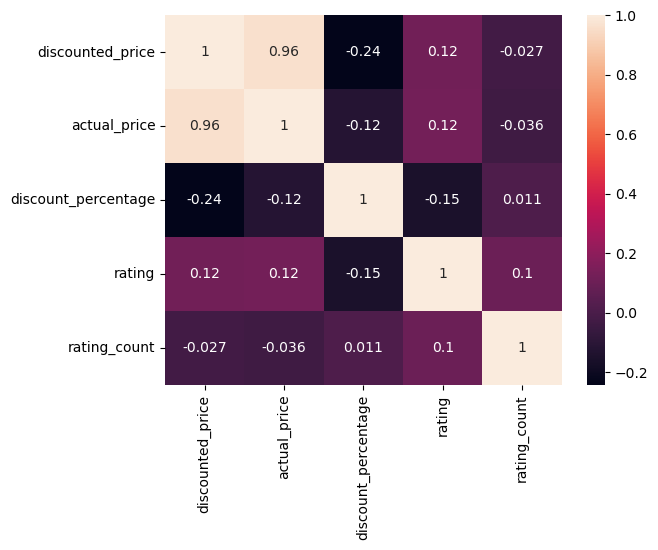

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Looking at the heatmap there doesn't seem to be any obvious correlation behind this. (actual - discount price doesn't give us any information beyond what we already know)<br>
Let's take a look at the products by category instead but first we need to split the categories into their different parts

In [86]:
categories = df['category'].str.split('|', expand=True)
categories

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


I think the first 2 categories are enough for some analysis as column 2 onwards gets more specific to the item

In [87]:
categories = categories.rename(columns={0:'cat_1', 1:'cat_2'})

In [88]:
categories.drop([2,3,4,5,6], axis=1, inplace=True)

In [118]:
df_backup = df.copy()

In [174]:
# df = df_backup.copy()

In [167]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,64,4.2,24269,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQ...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i..."


In [175]:
df = pd.concat([df.drop('category',axis=1), categories], axis=1)

In [176]:
print(f"{df['cat_1'].value_counts()} \n\n {df['cat_2'].value_counts()}")

cat_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64 

 cat_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                             

In [177]:
for col in ['cat_1', 'cat_2']:
    df[col] = df[col].apply(lambda x: x.replace(',', ', ').replace('&', ' & '))
    
# Function to add space before uppercase letters only if preceded by an alphanumeric character
def add_space_before_uppercase(s):
    return re.sub(r'(?<=[0-9a-z])(?=[A-Z])', ' ', s)

# Apply the function to the 'cat_1' and 'cat_2' columns
df['cat_1'] = df['cat_1'].apply(add_space_before_uppercase)
df['cat_2'] = df['cat_2'].apply(add_space_before_uppercase)

In [178]:
group1 = df.groupby('cat_1')
group2 = df.groupby('cat_2')

<Axes: xlabel='cat_1'>

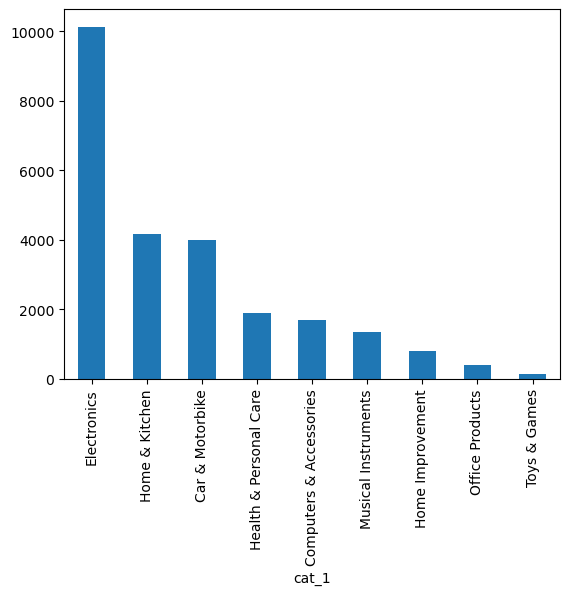

In [179]:
group1['actual_price'].mean().sort_values(ascending=False).plot.bar()

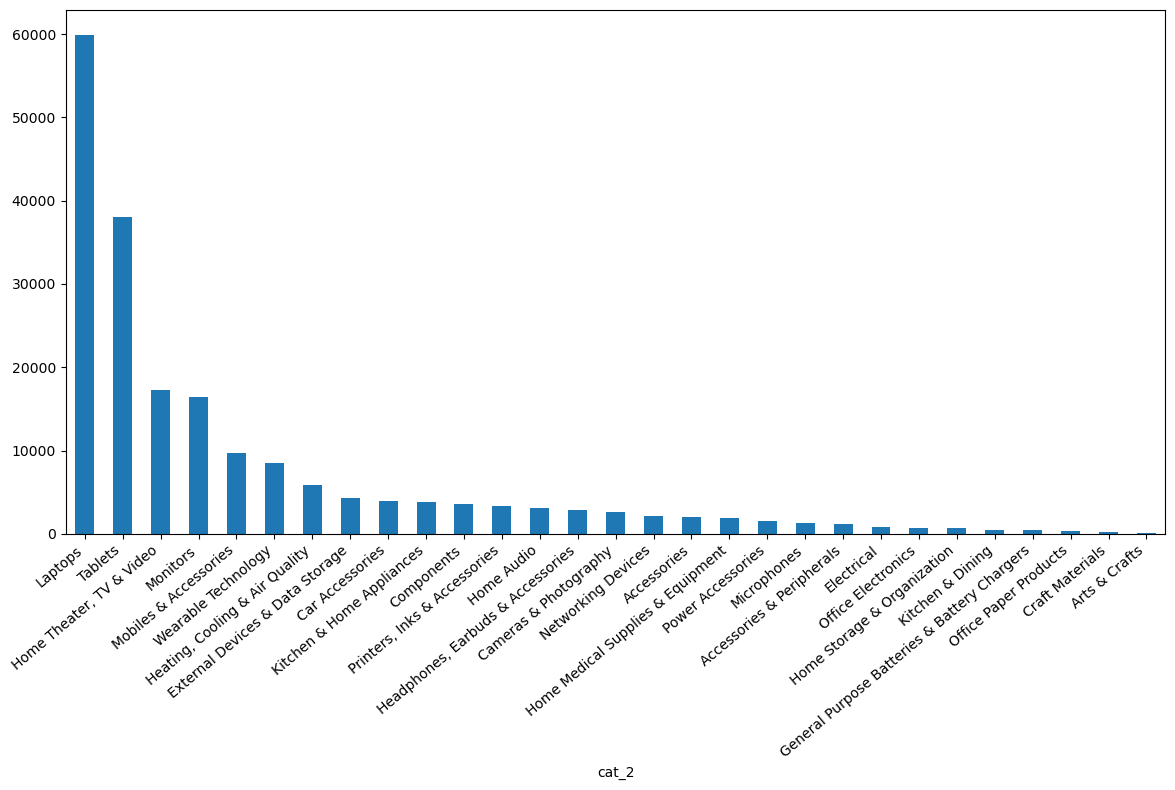

In [180]:
plt.figure(figsize=(12, 8))
group2['actual_price'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

In [181]:
group1['rating_count'].sum().sort_values(ascending=False)

cat_1
Electronics                15778848
Computers & Accessories     7728691
Home & Kitchen              2991069
Office Products              149675
Musical Instruments           88882
Toys & Games                  15867
Home Improvement               8566
Health & Personal Care         3663
Car & Motorbike                1118
Name: rating_count, dtype: int64

In [182]:
group2['rating_count'].sum().sort_values(ascending=False)

cat_2
Accessories & Peripherals                       5079479
Headphones, Earbuds & Accessories               4844658
Mobiles & Accessories                           4384197
Home Theater, TV & Video                        2895009
Kitchen & Home Appliances                       2052156
Wearable Technology                             1644476
Networking Devices                              1401750
Accessories                                     1183177
External Devices & Data Storage                 1037012
Heating, Cooling & Air Quality                   551371
Cameras & Photography                            322657
Home Audio                                       293704
Kitchen & Dining                                 270563
General Purpose Batteries & Battery Chargers     190302
Components                                       125025
Office Paper Products                            118700
Microphones                                       88882
Printers, Inks & Accessories              